In [2]:
# Loading Data
import pandas as pd
df = pd.read_csv("books.csv")

In [3]:
df.head()

,title,price,rating
0,A Light in the Attic,£51.77,Three
1,Tipping the Velvet,£53.74,One
2,Soumission,£50.10,One
3,Sharp Objects,£47.82,Four
4,Sapiens: A Brief History of Humankind,£54.23,Five


In [4]:
# Data Cleaning
1.# Checking for missing values
df.isnull().sum()

title     0
price     0
rating    0
dtype: int64

In [8]:
# cleaning price column
df["price"] = df["price"].str.replace('£', '').astype(float)

In [11]:
rating_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5,
}

df["rating"] = df["rating"].map(rating_mapping)

In [12]:
#Data Analysis

In [13]:
print(df.describe()) 

            price       rating
count  1000.00000  1000.000000
mean     35.07035     2.923000
std      14.44669     1.434967
min      10.00000     1.000000
25%      22.10750     2.000000
50%      35.98000     3.000000
75%      47.45750     4.000000
max      59.99000     5.000000


In [14]:
import matplotlib.pyplot as plt

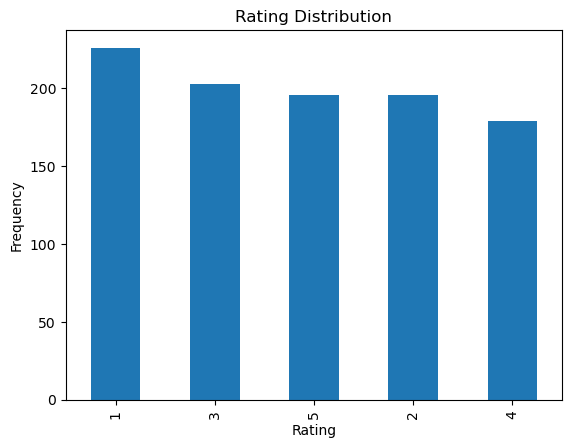

In [16]:
# Distribution of Ratings
df["rating"].value_counts().plot(kind='bar', title='Rating Distribution')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

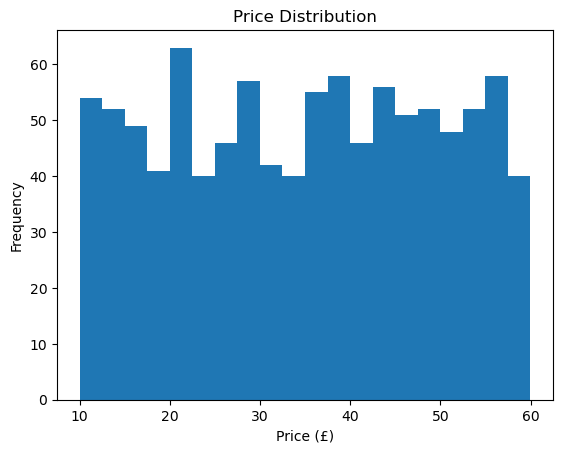

In [17]:
# Price Distribution
df["price"].plot(kind='hist', bins=20, title='Price Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

In [18]:
# average price by rating
avg_price_by_rating = df.groupby('rating')['price'].mean()
print(avg_price_by_rating)

rating
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: price, dtype: float64


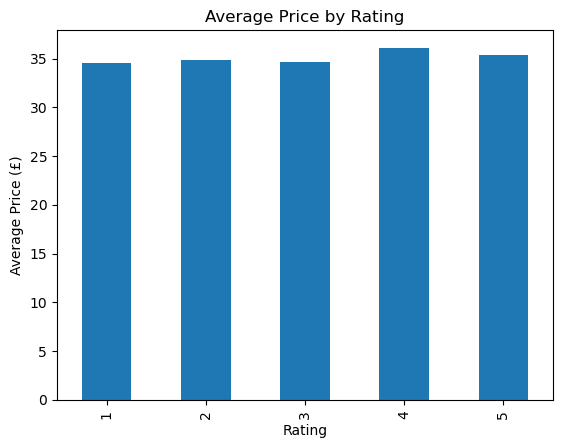

In [19]:
avg_price_by_rating.plot(kind='bar', title='Average Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Price (£)')
plt.show()

In [20]:
# Finding top 10 most expensive books
top_expensive_books = df.nlargest(10, 'price')
print(top_expensive_books[['price', 'title']])

     price                                              title
648  59.99                 The Perfect Play (Play by Play #1)
617  59.98                  Last One Home (New Beginnings #1)
860  59.95                   Civilization and Its Discontents
560  59.92                     The Barefoot Contessa Cookbook
366  59.90                          The Diary of a Young Girl
657  59.71  The Bone Hunters (Lexy Vaughan & Steven Macaul...
133  59.64  Thomas Jefferson and the Tripoli Pirates: The ...
387  59.48                      Boar Island (Anna Pigeon #19)
393  59.45                          The Improbability of Love
549  59.45  The Man Who Mistook His Wife for a Hat and Oth...


In [21]:
# finding top 10 cheapest books
top_cheapest_books = df.nsmallest(10, 'price')
print(top_cheapest_books[['price', 'title']])

     price                                              title
638  10.00                         An Abundance of Katherines
501  10.01                              The Origin of Species
716  10.02  The Tipping Point: How Little Things Can Make ...
84   10.16                                           Patience
302  10.23                               Greek Mythic History
558  10.27  The Fellowship of the Ring (The Lord of the Ri...
479  10.29                                  History of Beauty
242  10.40  The Lucifer Effect: Understanding How Good Peo...
434  10.41  NaNo What Now? Finding your editing process, r...
274  10.56                                       Pet Sematary


price_range
0-10       1
10-20    195
20-30    207
30-40    194
40-50    205
50+      198
Name: count, dtype: int64


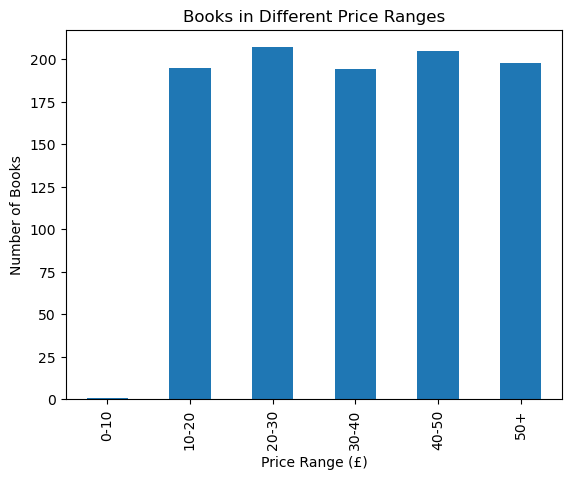

In [22]:
# Price Range Analysis
price_bins = [0, 10, 20, 30, 40, 50, 100]
price_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

price_range_counts = df['price_range'].value_counts().sort_index()
print(price_range_counts)

price_range_counts.plot(kind='bar', title='Books in Different Price Ranges')
plt.xlabel('Price Range (£)')
plt.ylabel('Number of Books')
plt.show()

Correlation between rating and price: 0.028166239485872973


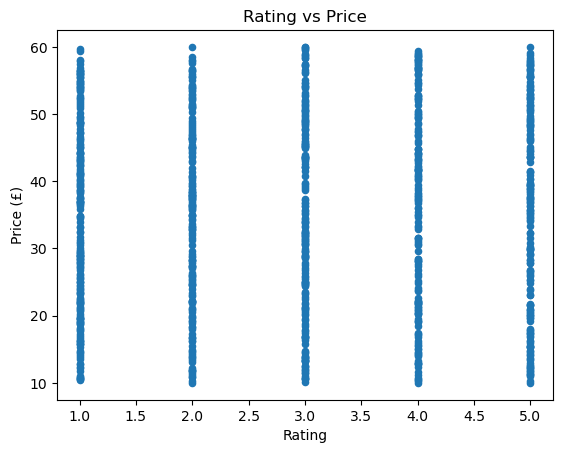

In [25]:
# Correlation Between Rating and Price

correlation = df['rating'].corr(df['price'])
print(f'Correlation between rating and price: {correlation}')

df.plot(kind='scatter', x='rating', y='price', title='Rating vs Price')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.show()

rating
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: price, dtype: float64


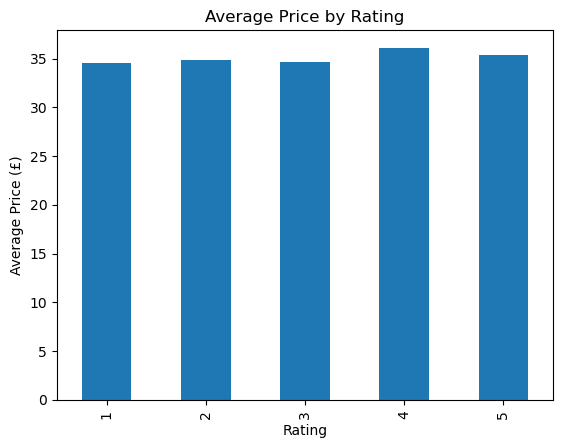

In [27]:
# Average price per rating category
avg_price_by_rating = df.groupby('rating')['price'].mean()
print(avg_price_by_rating)

avg_price_by_rating.plot(kind='bar', title='Average Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Price (£)')
plt.show()

rating              1         2         3         4         5
price_range                                                  
0-10         0.000000  0.000000  0.000000  0.000000  1.000000
10-20        0.225641  0.184615  0.210256  0.169231  0.210256
20-30        0.270531  0.193237  0.198068  0.164251  0.173913
30-40        0.190722  0.252577  0.206186  0.149485  0.201031
40-50        0.239024  0.180488  0.204878  0.209756  0.165854
50+          0.202020  0.171717  0.196970  0.202020  0.227273


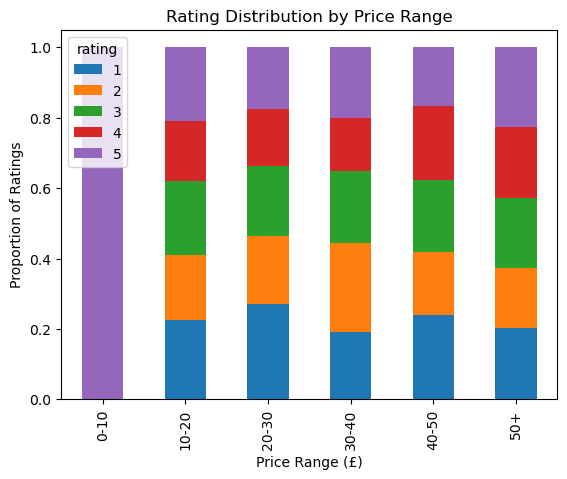

In [28]:
# Rating Distribution by Price Range
rating_by_price_range = df.groupby('price_range')['rating'].value_counts(normalize=True).unstack().fillna(0)
print(rating_by_price_range)

rating_by_price_range.plot(kind='bar', stacked=True, title='Rating Distribution by Price Range')
plt.xlabel('Price Range (£)')
plt.ylabel('Proportion of Ratings')
plt.show()

In [33]:
# finding top rated books
top_rated_books = df[df["rating"] == 5]
print(top_rated_books[['title', 'price']])

                                                 title  price
4                Sapiens: A Brief History of Humankind  54.23
12                                         Set Me Free  17.46
13   Scott Pilgrim's Precious Little Life (Scott Pi...  52.29
14                           Rip it Up and Start Again  35.02
23                          Chase Me (Paris Nights #2)  25.27
..                                                 ...    ...
985                    Deep Under (Walker Security #1)  47.09
989                                       Bright Lines  39.07
993  Bleach, Vol. 1: Strawberry and the Soul Reaper...  34.65
997  A Spy's Devotion (The Regency Spies of London #1)  16.97
999                 1,000 Places to See Before You Die  26.08

[196 rows x 2 columns]


In [34]:
# checking price variability
price_std = df["price"].std()
print(f"Standard Deviation of Book Prices {price_std}")

Standard Deviation of Book Prices 14.446689669952772


rating
1    34.770
2    36.215
3    33.780
4    37.800
5    36.900
Name: price, dtype: float64


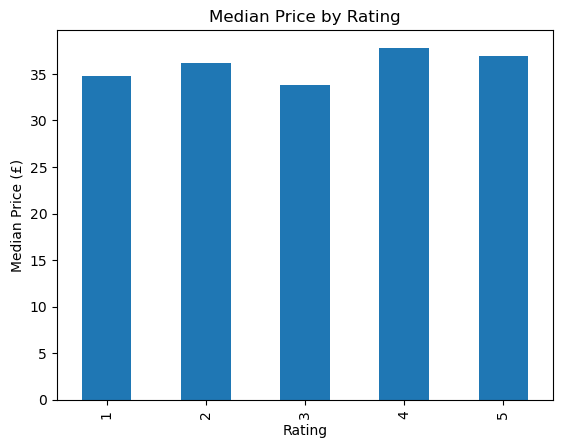

In [35]:
# Median price by rating
median_price_by_rating = df.groupby('rating')['price'].median()
print(median_price_by_rating)

median_price_by_rating.plot(kind='bar', title='Median Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Median Price (£)')
plt.show()

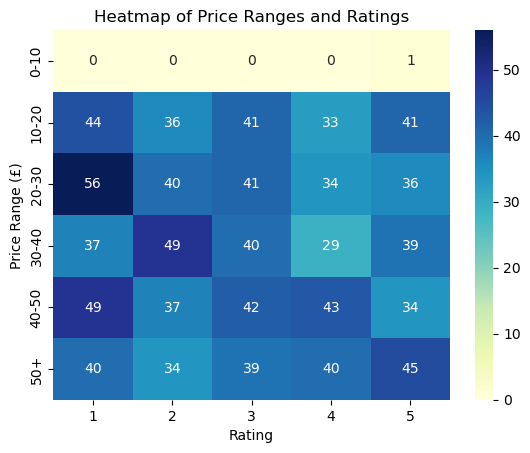

In [36]:
# pricing and rating heatmap
import seaborn as sns

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='price_range', columns='rating', aggfunc='size', fill_value=0)

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Price Ranges and Ratings')
plt.xlabel('Rating')
plt.ylabel('Price Range (£)')
plt.show()